# PROJECT 1: Predicting and Enhancing Employee Performance Through HR Analytics

## Data Loading and Preparation

In [26]:
from google.colab import files
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Upload a CSV file
uploaded = files.upload()

# Print the keys of the uploaded dictionary to confirm the filename
print(uploaded.keys())

# Dynamically retrieve the first key from the uploaded dictionary
file_key = next(iter(uploaded))

# Convert the bytes to a file-like object and read it into a pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded[file_key]))
df.head()

Saving Uncleaned_employees_final_dataset (1).csv to Uncleaned_employees_final_dataset (1) (1).csv
dict_keys(['Uncleaned_employees_final_dataset (1) (1).csv'])


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [27]:
#print data info to identify categorical and numerical columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB


In [28]:
#display summary statistics of numerical columns
print("\nSummary Statistics of Numerical Columns:")
df.describe()


Summary Statistics of Numerical Columns:


,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
count,17417.000000,17417.000000,17417.000000,16054.000000,17417.000000,17417.000000,17417.000000,17417.000000
mean,39083.491129,1.250732,34.807774,3.345459,5.801860,0.358845,0.023368,63.176322
std,22707.024087,0.595692,7.694046,1.265386,4.175533,0.479675,0.151074,13.418179
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19281.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,39122.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58838.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,75.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [29]:
#print unique values count of each categorical column
categorical_columns = ['department', 'region', 'education', 'gender', 'recruitment_channel']
print("\nUnique Value Counts of Categorical Columns:")
for column in categorical_columns:
    print(f"\n{column}:")
    print(df[column].value_counts())



Unique Value Counts of Categorical Columns:

department:
department
Sales & Marketing    5458
Operations           3524
Procurement          2240
Technology           2199
Analytics            1697
HR                    833
Finance               802
Legal                 332
R&D                   332
Name: count, dtype: int64

region:
region
region_2     3918
region_22    1990
region_7     1488
region_13     860
region_15     843
region_26     748
region_31     646
region_4      571
region_27     516
region_16     452
region_28     430
region_11     420
region_23     376
region_32     318
region_19     315
region_29     308
region_17     268
region_14     265
region_5      252
region_25     248
region_20     242
region_6      220
region_8      209
region_30     209
region_10     209
region_1      174
region_24     165
region_12     156
region_9      134
region_21     129
region_34     123
region_3      110
region_33      91
region_18      14
Name: count, dtype: int64

education:
educa

In [30]:
#print unique values in each categorical column
print("\nUnique values in each categorical column:")
for column in categorical_columns:
    print(f"\n{column}:")
    print(df[column].unique())


Unique values in each categorical column:

department:
['Technology' 'HR' 'Sales & Marketing' 'Procurement' 'Finance' 'Analytics'
 'Operations' 'Legal' 'R&D']

region:
['region_26' 'region_4' 'region_13' 'region_2' 'region_29' 'region_7'
 'region_22' 'region_16' 'region_17' 'region_24' 'region_11' 'region_27'
 'region_9' 'region_20' 'region_34' 'region_23' 'region_8' 'region_14'
 'region_31' 'region_19' 'region_5' 'region_28' 'region_15' 'region_3'
 'region_25' 'region_12' 'region_21' 'region_30' 'region_10' 'region_33'
 'region_32' 'region_6' 'region_1' 'region_18']

education:
['Bachelors' 'Masters & above' nan 'Below Secondary']

gender:
['m' 'f']

recruitment_channel:
['sourcing' 'other' 'referred']


In [31]:
#check for missing values
print("\nMissing Values:")
df.isna().sum()


Missing Values:


employee_id                 0
department                  0
region                      0
education                 771
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     1363
length_of_service           0
KPIs_met_more_than_80       0
awards_won                  0
avg_training_score          0
dtype: int64

There are several missing values in the education and previous_year_rating columns. Depending on how we handle these missing values, it could impact our analysis.

For the education column, I plan to use the mode to calculate the most frequently occurring value and replace the missing values with that value. This method is suitable because education is a categorical variable, and using the mode will maintain the distribution of the data.

For the previous_year_rating column, I intend to use the median function to calculate the median value and replace the missing values with it. This approach is ideal for numerical data, especially if the data is skewed or contains outliers, as the median is less affected by extreme values and provides a more robust central tendency.

I believe these imputation methods are the best choices for maintaining the integrity and distribution of the data in our dataset.

In [32]:
#handle missing values -
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['previous_year_rating'].fillna(df['previous_year_rating'].median(), inplace=True)

In [33]:
#check missing values after imputation
df.isna().sum()

employee_id              0
department               0
region                   0
education                0
gender                   0
recruitment_channel      0
no_of_trainings          0
age                      0
previous_year_rating     0
length_of_service        0
KPIs_met_more_than_80    0
awards_won               0
avg_training_score       0
dtype: int64

# EDA VISUALIZATION

We visualize the distribution of categorical and numerical features to understand their distributions.

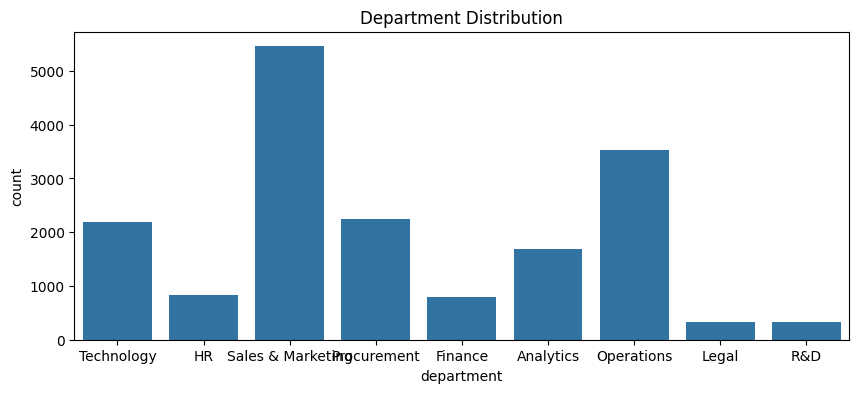

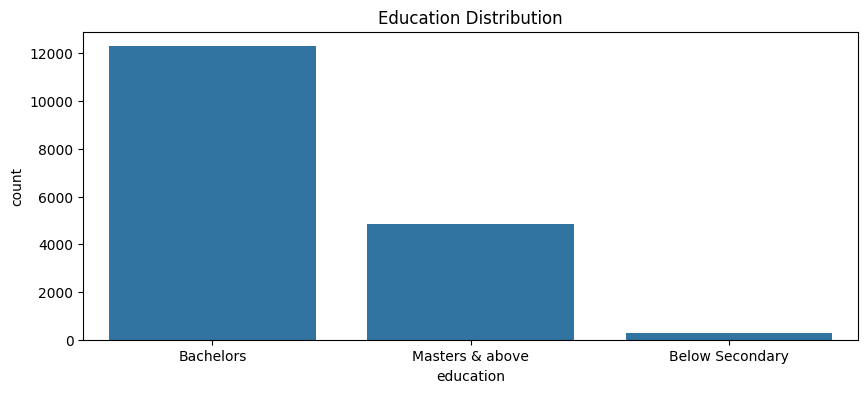

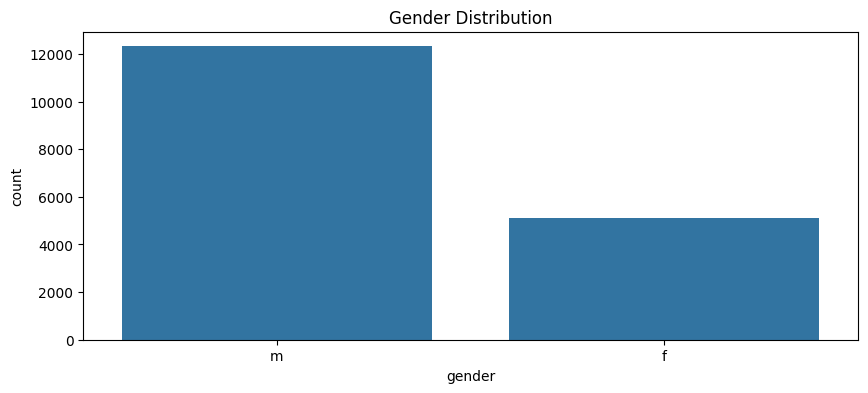

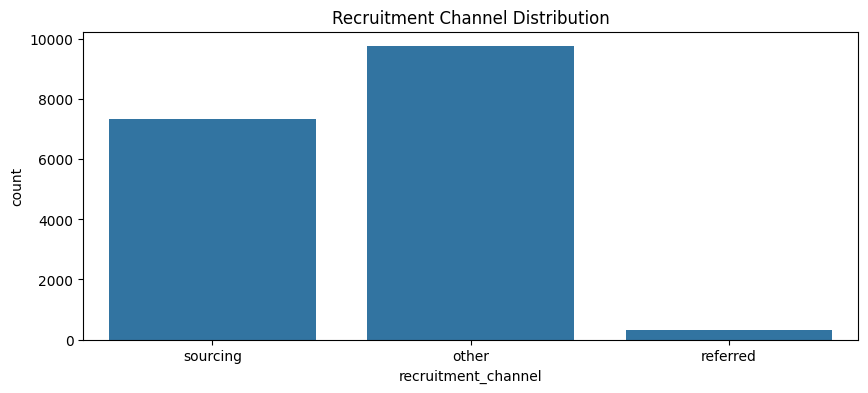

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of categorical features
plt.figure(figsize=(10, 4))
sns.countplot(x='department', data=df)
plt.title('Department Distribution')
plt.show()

plt.figure(figsize=(10, 4))
sns.countplot(x='education', data=df)
plt.title('Education Distribution')
plt.show()

plt.figure(figsize=(10, 4))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

plt.figure(figsize=(10, 4))
sns.countplot(x='recruitment_channel', data=df)
plt.title('Recruitment Channel Distribution')
plt.show()

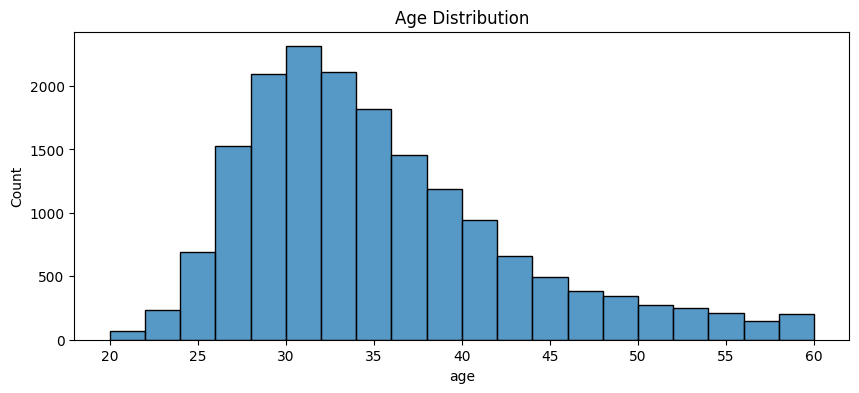

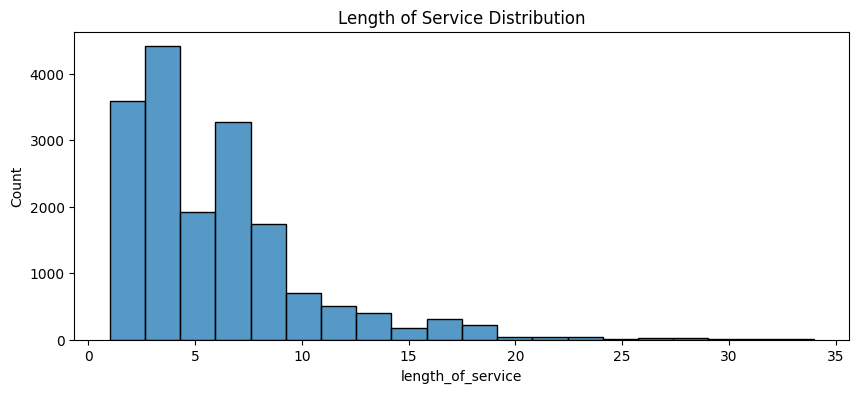

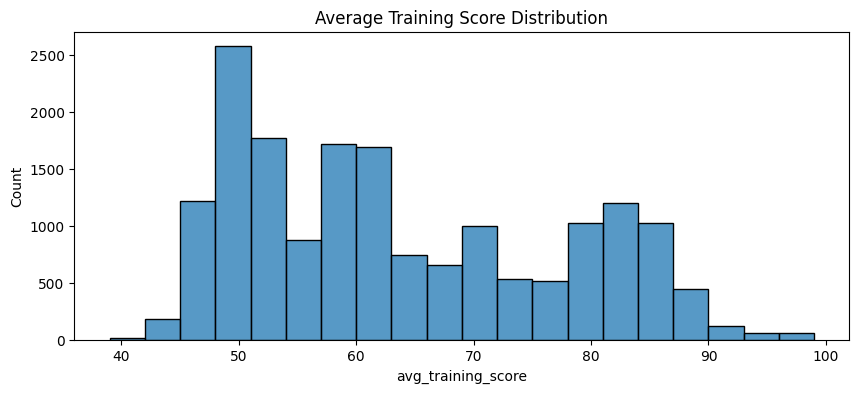

In [35]:
# Distribution of numerical features
plt.figure(figsize=(10, 4))
sns.histplot(df['age'], bins=20, kde=False)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(df['length_of_service'], bins=20, kde=False)
plt.title('Length of Service Distribution')
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(df['avg_training_score'], bins=20, kde=False)
plt.title('Average Training Score Distribution')
plt.show()

### Checking for Outliers

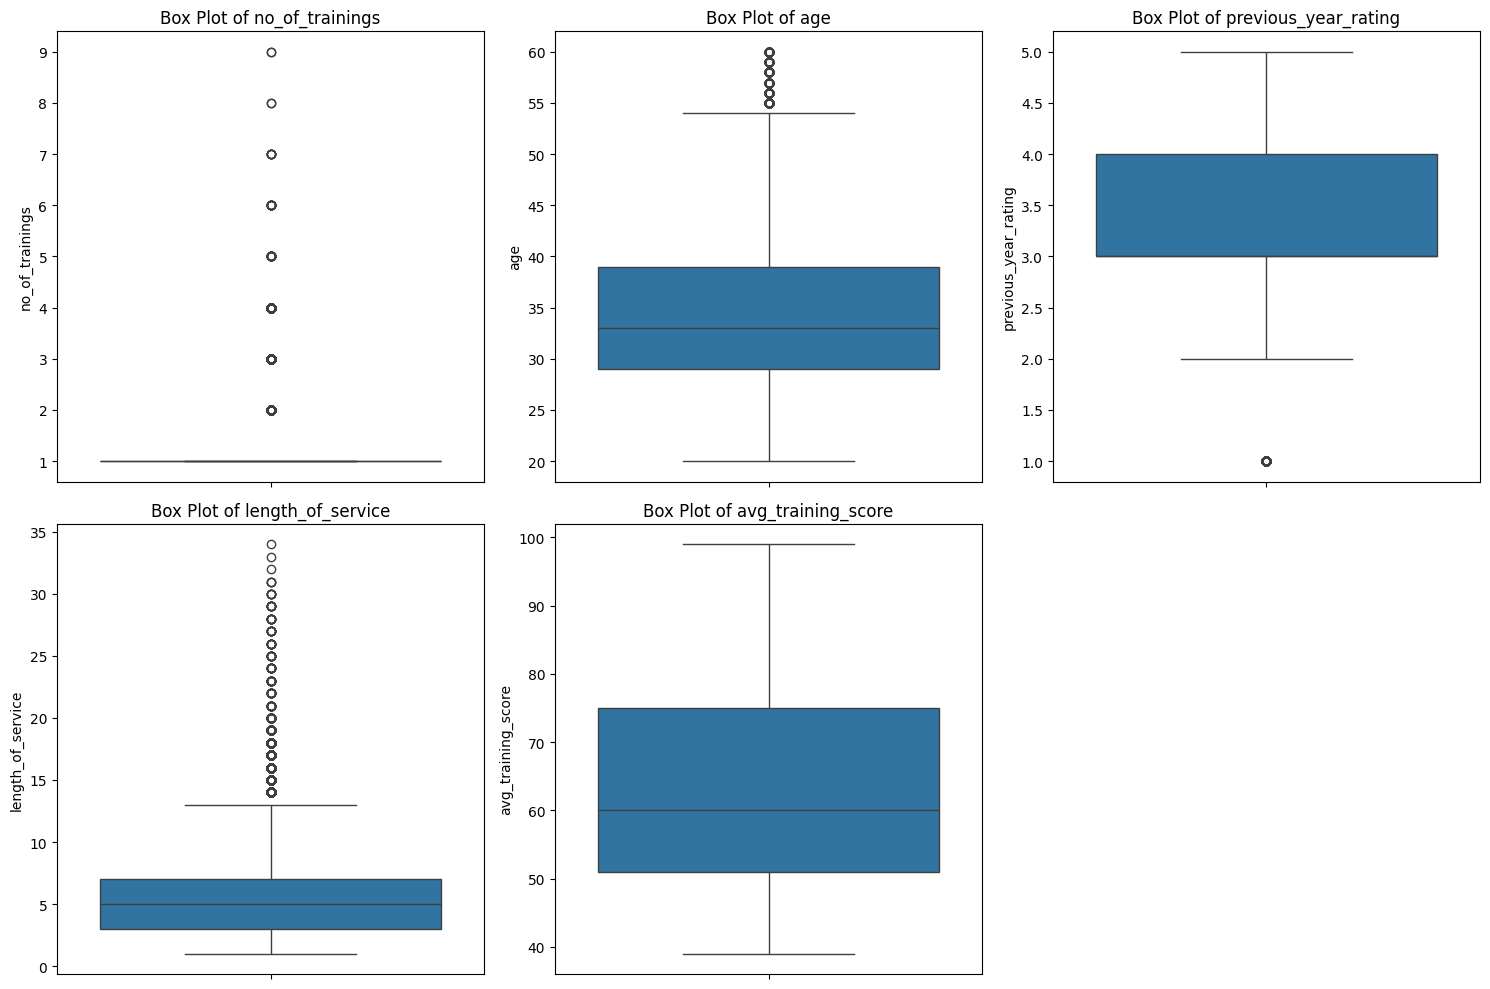

In [36]:
# List of numerical columns to check for outliers
numerical_columns = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create a box plot for each numerical column
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  # Create a subplot for each box plot
    sns.boxplot(data=df, y=column)
    plt.title(f'Box Plot of {column}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Upon examining the box plots. It is evident that there are some outliers present in the data. Specifically, the variables no_of_trainings, age, and length_of_service show outliers. However, after a thorough investigation, these outliers have been determined to be within the realm of normal variation for the dataset.

## Relationship between Key Features and Target variable

### Distribution of Employee Performance levels By Recruitment channel

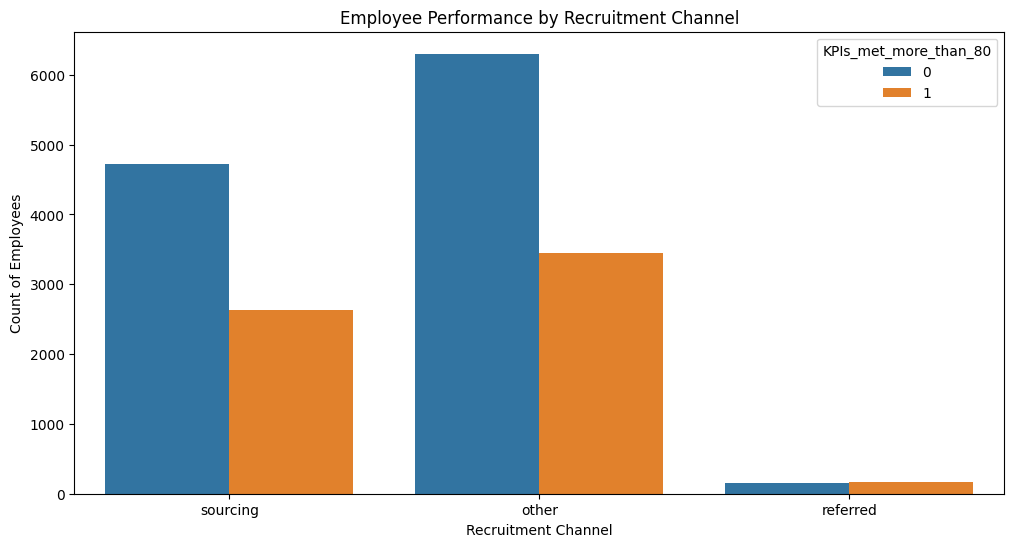

In [37]:
# Visualize the distribution of performance levels by recruitment channel
plt.figure(figsize=(12, 6))
sns.countplot(x='recruitment_channel', hue='KPIs_met_more_than_80', data=df)
plt.title('Employee Performance by Recruitment Channel')
plt.xlabel('Recruitment Channel')
plt.ylabel('Count of Employees')
plt.show()

### Distribution of Employee Performance levels by number of trainings

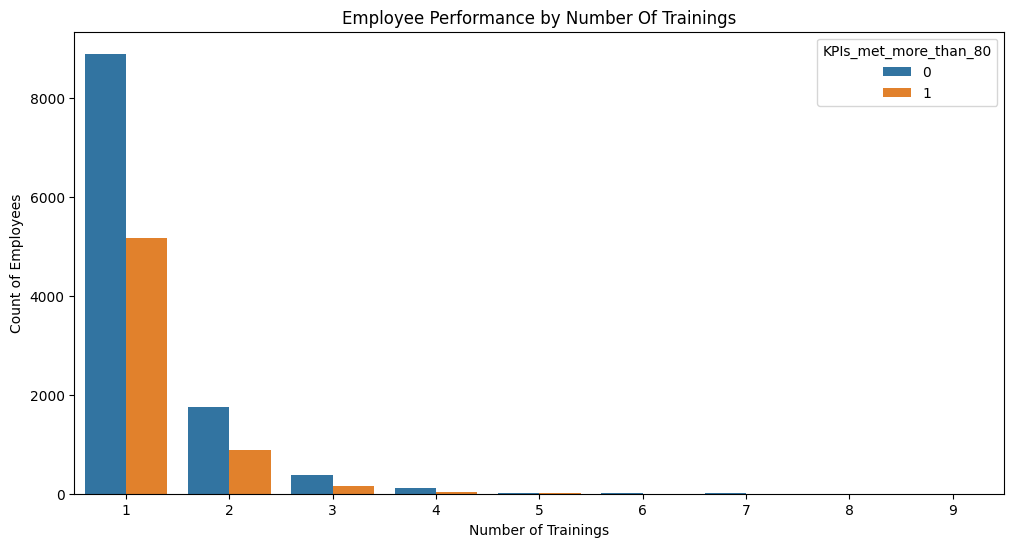

In [38]:
# Visualize the distribution of performance levels by number of trainings
plt.figure(figsize=(12, 6))
sns.countplot(x='no_of_trainings', hue='KPIs_met_more_than_80', data=df)
plt.title('Employee Performance by Number Of Trainings')
plt.xlabel('Number of Trainings')
plt.ylabel('Count of Employees')
plt.show()

### Statistical Test (ANOVA) to confirm Findings

In [39]:
from scipy.stats import f_oneway

# Perform ANOVA test to see if there's a significant difference in performance across recruitment channels
channels = ['sourcing', 'other', 'referred']
groups = [df[df['recruitment_channel'] == channel]['KPIs_met_more_than_80'] for channel in channels]
anova_result_recruitment = f_oneway(*groups)
print('ANOVA result for recruitment channels:', anova_result_recruitment)

# Perform ANOVA test to see if there's a significant difference in performance based on training programs
training_groups = [df[df['no_of_trainings'] == i]['KPIs_met_more_than_80'] for i in df['no_of_trainings'].unique()]
anova_result_training = f_oneway(*training_groups)
print('ANOVA result for training programs:', anova_result_training)


ANOVA result for recruitment channels: F_onewayResult(statistic=21.52180300534083, pvalue=4.6209613790981536e-10)
ANOVA result for training programs: F_onewayResult(statistic=5.446805540239299, pvalue=6.986898897007903e-07)


## FEATURE ENGINEERING
We convert categorical variables to numerical using Label, frequency and one-hot encoding.

In [40]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for binary categorical variable 'gender'
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

# Frequency encoding for 'region' with high cardinality
region_freq_encoding = df['region'].value_counts() / len(df)
df['region'] = df['region'].map(region_freq_encoding)

# One-hot encoding for other categorical variables
df = pd.get_dummies(df, columns=['department', 'education', 'recruitment_channel'], drop_first=True)

# Display the updated dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   employee_id                   17417 non-null  int64  
 1   region                        17417 non-null  float64
 2   gender                        17417 non-null  int64  
 3   no_of_trainings               17417 non-null  int64  
 4   age                           17417 non-null  int64  
 5   previous_year_rating          17417 non-null  float64
 6   length_of_service             17417 non-null  int64  
 7   KPIs_met_more_than_80         17417 non-null  int64  
 8   awards_won                    17417 non-null  int64  
 9   avg_training_score            17417 non-null  int64  
 10  department_Finance            17417 non-null  bool   
 11  department_HR                 17417 non-null  bool   
 12  department_Legal              17417 non-null  bool   
 13  d

## Correlation between features and the target Variable

KPIs_met_more_than_80           1.000000
previous_year_rating            0.329796
awards_won                      0.105343
department_Operations           0.085939
avg_training_score              0.071947
recruitment_channel_referred    0.049470
education_Below Secondary       0.028605
department_R&D                  0.026141
region                          0.020244
department_Finance              0.017823
education_Masters & above       0.012246
department_Procurement          0.011509
employee_id                     0.010275
department_HR                   0.000607
department_Legal               -0.000995
recruitment_channel_sourcing   -0.001491
department_Technology          -0.002198
age                            -0.025368
gender                         -0.040716
no_of_trainings                -0.045027
length_of_service              -0.079599
department_Sales & Marketing   -0.114980
Name: KPIs_met_more_than_80, dtype: float64


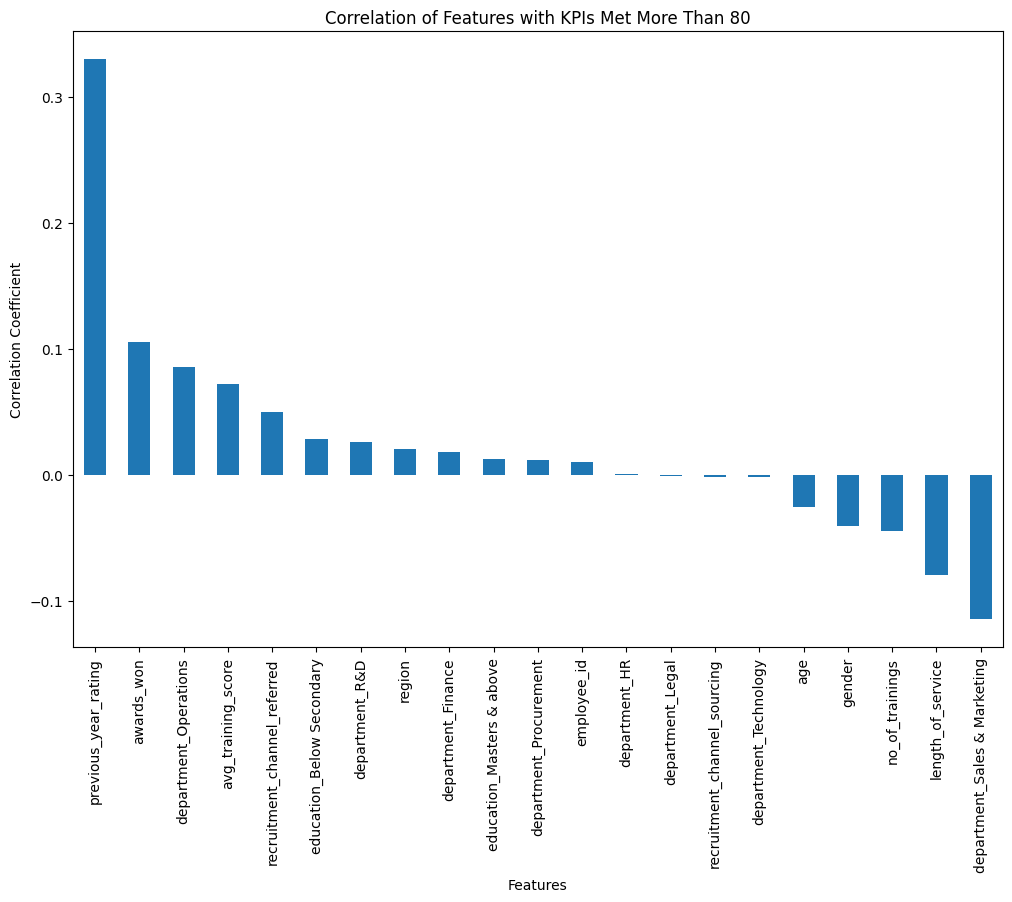

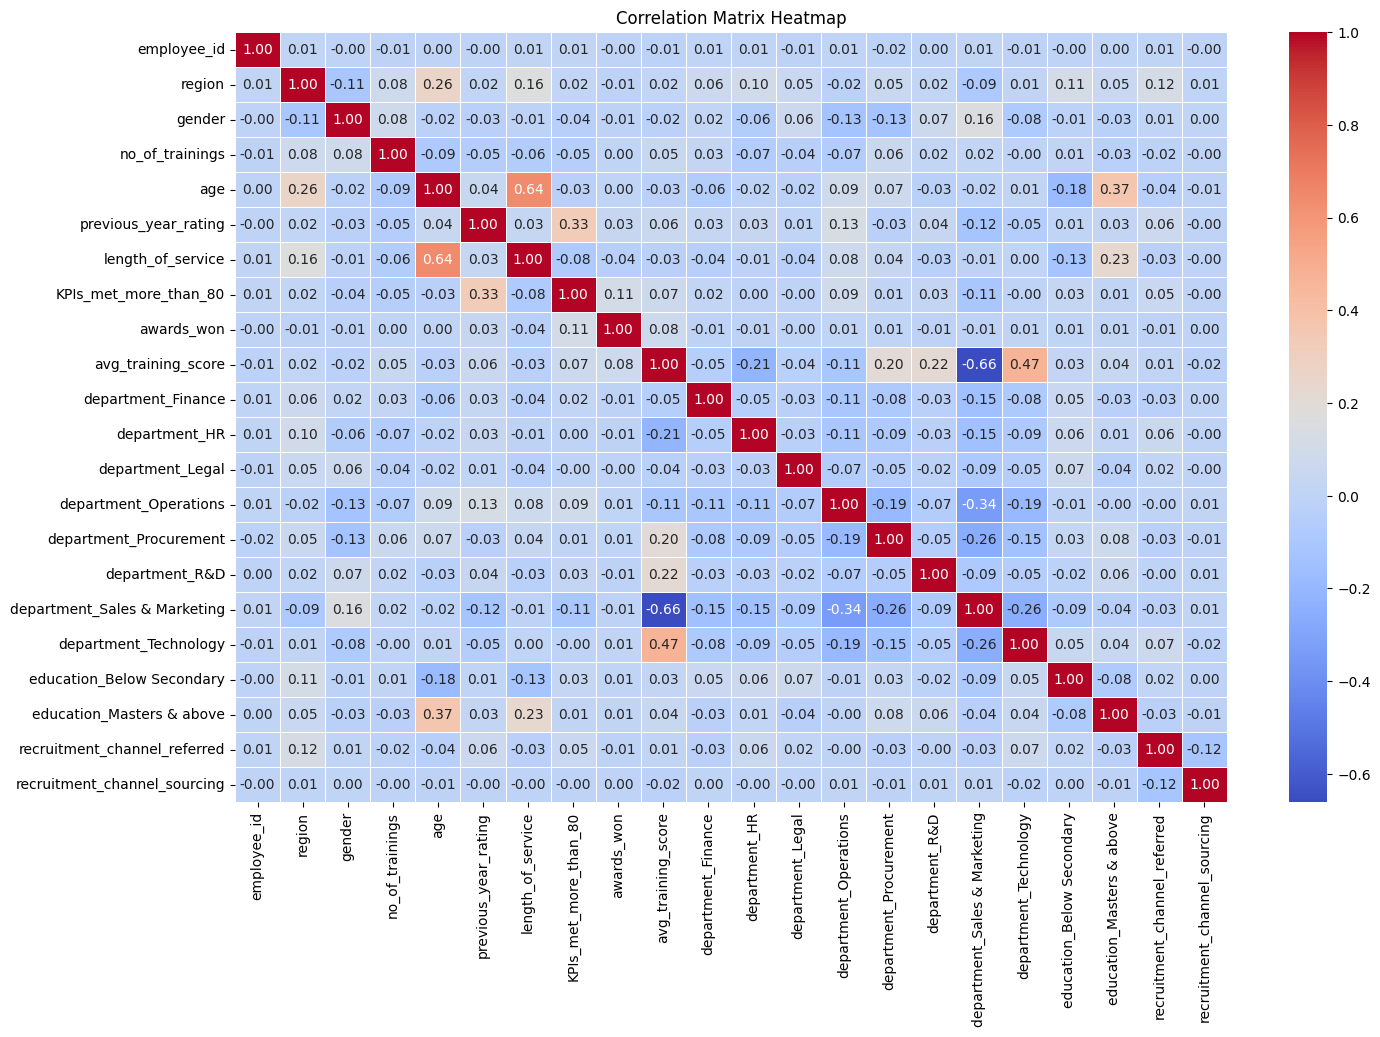

In [41]:
numerical_df = df.select_dtypes(include=['int64', 'float64', 'bool'])

# Calculate correlation of each feature with 'KPIs_met_more_than_80'
correlation_with_target = numerical_df.corr()['KPIs_met_more_than_80'].sort_values(ascending=False)

# Print the correlation with target column
print(correlation_with_target)

# Plot the correlation with target column as a bar chart
plt.figure(figsize=(12, 8))
correlation_with_target.drop('KPIs_met_more_than_80').plot(kind='bar')
plt.title('Correlation of Features with KPIs Met More Than 80')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

# Plot the heatmap of the correlation matrix including only numerical columns
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## MODEL TRAINING AND EVALUATION
We train a logistic regression model to predict the target variable and evaluate its performance.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define features and target
X = df.drop(columns=['KPIs_met_more_than_80'])
y = df['KPIs_met_more_than_80']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred = log_reg.predict(X_test_scaled)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.7146957520091849
              precision    recall  f1-score   support

           0       0.74      0.87      0.80      2253
           1       0.64      0.43      0.52      1231

    accuracy                           0.71      3484
   macro avg       0.69      0.65      0.66      3484
weighted avg       0.70      0.71      0.70      3484



## Hyperparameter Tuning the Logistics Regression Model
We perform hyperparameter tuning using GridSearchCV to improve the model performance.

In [43]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for logistic regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Initialize and perform grid search
grid_search = GridSearchCV(LogisticRegression(max_iter=200), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and train the model
best_params = grid_search.best_params_
log_reg_tuned = LogisticRegression(**best_params, max_iter=200)
log_reg_tuned.fit(X_train_scaled, y_train)

# Predict and evaluate the tuned model
y_pred_tuned = log_reg_tuned.predict(X_test_scaled)
print('Tuned Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))

Tuned Logistic Regression Accuracy: 0.7112514351320322
              precision    recall  f1-score   support

           0       0.73      0.87      0.80      2253
           1       0.64      0.41      0.50      1231

    accuracy                           0.71      3484
   macro avg       0.69      0.64      0.65      3484
weighted avg       0.70      0.71      0.69      3484



## Trying Other Classification Algorithms
We compare the logistic regression model with other classifiers like Random Forest, Gradient Boosting, and SVM.

In [44]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)
print('Gradient Boosting Accuracy:', accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

# Support Vector Machine Classifier
svc = SVC()
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)
print('SVM Accuracy:', accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

Random Forest Accuracy: 0.7075200918484501
              precision    recall  f1-score   support

           0       0.73      0.86      0.79      2253
           1       0.63      0.42      0.50      1231

    accuracy                           0.71      3484
   macro avg       0.68      0.64      0.65      3484
weighted avg       0.70      0.71      0.69      3484

Gradient Boosting Accuracy: 0.715556831228473
              precision    recall  f1-score   support

           0       0.73      0.89      0.80      2253
           1       0.66      0.40      0.50      1231

    accuracy                           0.72      3484
   macro avg       0.70      0.64      0.65      3484
weighted avg       0.71      0.72      0.69      3484

SVM Accuracy: 0.7083811710677382
              precision    recall  f1-score   support

           0       0.72      0.91      0.80      2253
           1       0.67      0.34      0.45      1231

    accuracy                           0.71      3484
   mac

## Hyperparameter Tuning the GradientBoosting Model
We perform hyperparameter tuning using GridSearchCV to improve the model performance since it is the best performing of all the models

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Define the parameter distributions
param_dist = {
    'n_estimators': sp_randint(100, 300),
    'learning_rate': sp_uniform(0.01, 0.2),
    'max_depth': sp_randint(3, 6),
    'subsample': sp_uniform(0.8, 0.2),
    'min_samples_split': sp_randint(2, 10),
    'min_samples_leaf': sp_randint(1, 4)
}

#Initialize the Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)

#Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gb, param_distributions=param_dist,
                                   n_iter=50, cv=3, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train_scaled, y_train)

# Get the best parameters and the best estimator
best_params = random_search.best_params_
best_gb = random_search.best_estimator_

# Print the best parameters
print("Best parameters found: ", best_params)

# Evaluate the best model
y_pred_best_gb = best_gb.predict(X_test_scaled)
print('Tuned Gradient Boosting Accuracy:', accuracy_score(y_test, y_pred_best_gb))
print(classification_report(y_test, y_pred_best_gb))



Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:  {'learning_rate': 0.038573363584388155, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 101, 'subsample': 0.944399754453365}
Tuned Gradient Boosting Accuracy: 0.7184270952927669
              precision    recall  f1-score   support

           0       0.73      0.89      0.80      2253
           1       0.67      0.41      0.50      1231

    accuracy                           0.72      3484
   macro avg       0.70      0.65      0.65      3484
weighted avg       0.71      0.72      0.70      3484



#### After Hypertuning observations
Accuracy: Increased slightly from 0.7156 to 0.7184.
Precision: Improved for Class 1 from 0.66 to 0.67.
Recall: Improved for Class 1 from 0.40 to 0.41.
F1-Score: Remained the same for both classes.
The hypertuning process has resulted in a slight improvement in model performance.

###Conclusion
The model performs moderately well with an accuracy of around 72% and some improvements after hypertuning. However, there is room for further improvement, especially in identifying Class 1 instances. By applying advanced techniques and continuing to refine the model, we can potentially achieve better performance.

## Feature Importance Analysis
Identyfying Factors affecting performance

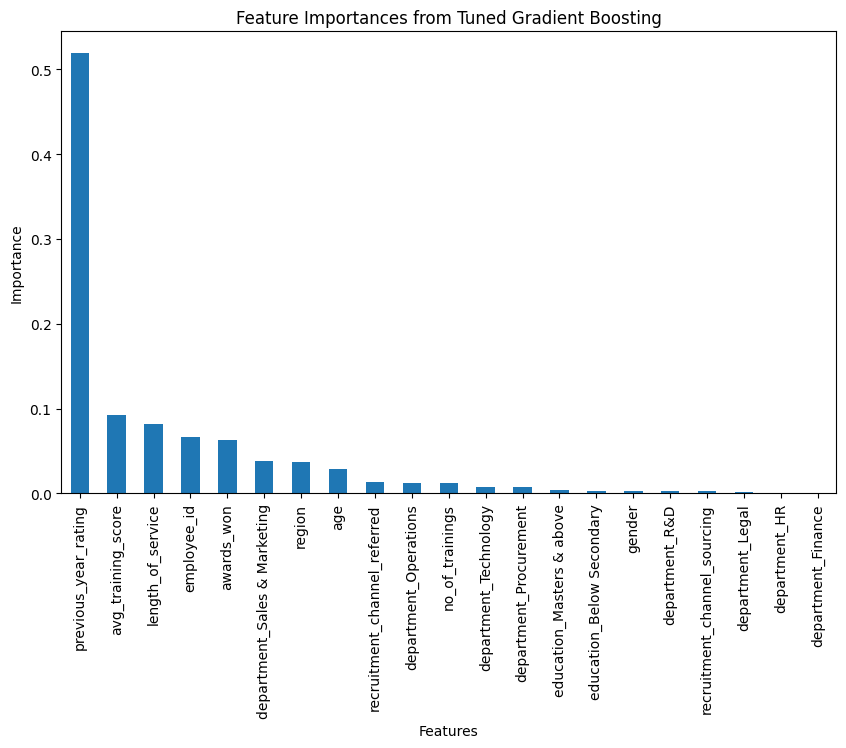

In [46]:
# Get feature importances from the tuned Gradient Boosting model
importances = best_gb.feature_importances_
feature_names = X_train.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances from Tuned Gradient Boosting')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


## Visualization of Model Performance Accuracy

<ipython-input-47-fc90ab3e5a38>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random Chance', color='red')


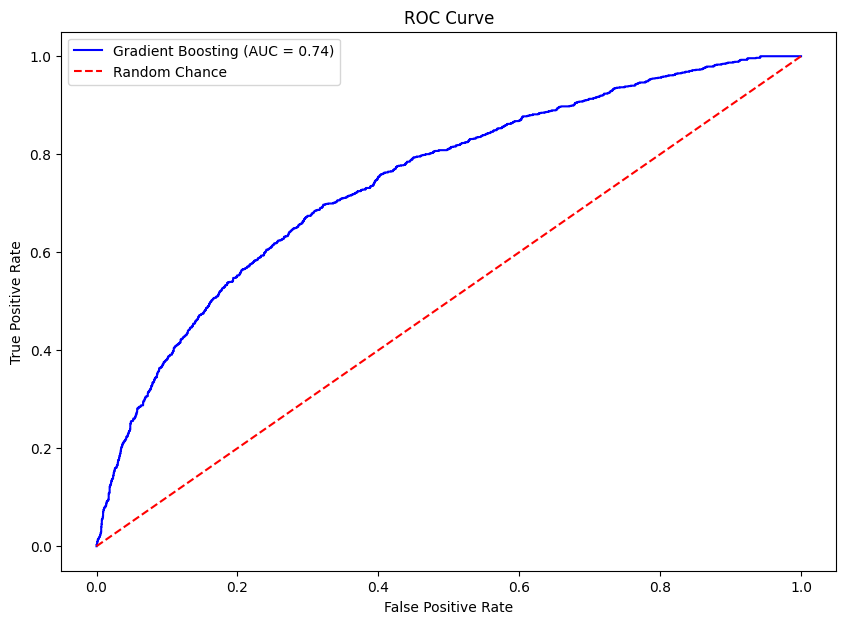

In [47]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = best_gb.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'Gradient Boosting (AUC = {auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


•	The ROC curve is above the diagonal (red dashed line representing random chance), which indicates that the model performs better than random guessing.

•	The ROC curve and AUC value of 0.74 suggest that the Gradient Boosting model has a decent performance in predicting the target variable.
